# **Feature Scaling & Feature Normalization**
Saturdays AI LATAM

12 de Septiembre de 2020

Mentor: María Inés Calderón Zetter

# **Feature Scaling**

Con Feature Scaling generalmente nos referimos a generar un cambio en el rango de los valores sin cambiar la forma de la distribución de los mismos, de esta forma es posible mejorar el performance de un algoritmo de machine learning o su tiempo de ejecución cuando sus features se encuentran en una escala similar o cercana a ser normalmente distribuída. 
Algunos algoritmos que pueden mejorar su performance mediante estas técnicas son:



*   Regresión logística y lineal
*   Nearest Neighbors
*   Redes Neurales
*   Análisis de componentes principales




# **Feature Scaling con scikit-learn**

De las metodologías mas populares para realizar feature scaling con scikit-learn tenemos:



*   StandardScaler
*   MinMaxScaler
*   RobustScaler
*   Normalizer



# **Standard Scaler**
Asume que los datos se encuentran normalmente distribuídos en cada feature, y los escala de forma que la distribución se centro al rededor de 0 con una desviación estándar de 1. Si los datos no están normalmente distribuídos, no es recomendable trabajar con este escalador.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

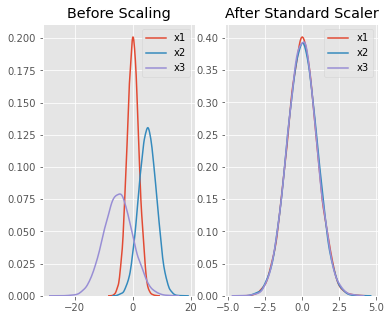

In [ ]:
np.random.seed(1)
df = pd.DataFrame({
    #np.random.normal(Centro, Escala, Tamaño)
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

# **Min-Max Scaler**
Probablemente uno de los algoritmos para generar escalas mas utilizados. Genera una disminición de los rangos con la cual el Standard Scaler podría no funcionar muy bien. Si la distribución no es Gaussiana o la desviación estándar es muy pequeña este algoritmo funciona mejor.

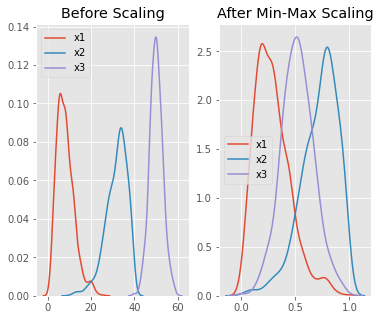

In [ ]:
df = pd.DataFrame({
    # positive skew
    #np.random.chisquare(Grado de aleatoriedad, tamaño)
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

# **Robust Scaler**
Utiliza un método similar al MinMaxScaler salvo que en lugar de min-max utiliza rangos intercuartíles, haciéndolo más robusto ante valores fuera de rangos.

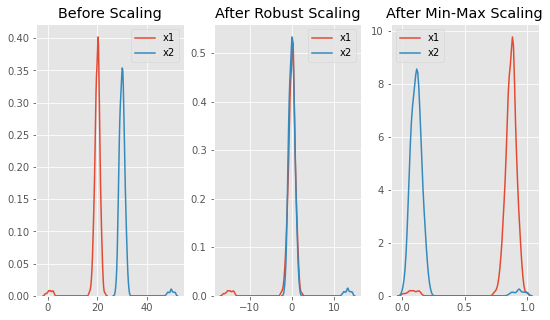

In [ ]:
x = pd.DataFrame({
    # Distribution with lower outliers
    #np.random.normal(Centro, Escala, Tamaño)
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

# **Normalizer**
El Normalizer escala cada valor dividiéndolo por su magnitud en un espacio n-dimensional por el n numero de elementos.

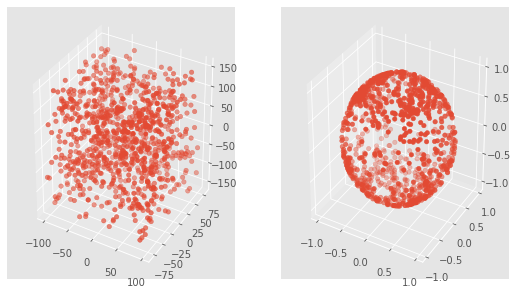

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({
    #np.random.randint(Minimo, Maximo, Tamaño)
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])Hola que tal Angie! Buena tarde, ok super quedo a la orden
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()





**Fuentes:**

*   Hale, J. (2020, 21 febrero). Scale, Standardize, or Normalize with Scikit-Learn - Towards Data Science. Medium. https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
*   Keen, B. A. (2017, 10 mayo). Feature Scaling with scikit-learn – Ben Alex Keen. Benalexkeen. https://benalexkeen.com/feature-scaling-with-scikit-learn/

*   Hale, J. (2019, 28 febrero). Guide to Scaling and Standardizing. Kaggle. https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing



